In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'
import numpy as np
# Import custom code
from erpsc.count_hack import Count
from erpsc.core.io import save_pickle_obj, load_pickle_obj
import csv
import re

###### load in terms and count, and filter for words with 100+ occurrences

217
['action', 'activation', 'acuity', 'adaptation', 'addiction', 'agency', 'anhedonia', 'anticipation', 'antisocial personality', 'anxiety', 'appetite', 'arousal', 'articulation', 'association', 'association learning', 'attachment', 'attention', 'attentional bias', 'attentional resources', 'attitude', 'auditory perception', 'autobiographical memory', 'balance', 'belief', 'categorization', 'circadian rhythm', 'cognitive control', 'cognitive development', 'cognitive dissonance', 'cognitive load', 'cognitive training', 'color perception', 'communication', 'competition', 'concept', 'conceptualization', 'conduct disorder', 'consciousness', 'consolidation', 'context', 'conversation', 'coordination', 'cueing', 'deception', 'decision', 'decision making', 'declarative memory', 'depth perception', 'desire', 'detection', 'discourse', 'discrimination', 'distraction', 'divided attention', 'Dyslexia', 'eating', 'efficiency', 'effort', 'egocentric', 'embodied cognition', 'emotion', 'emotion recognit

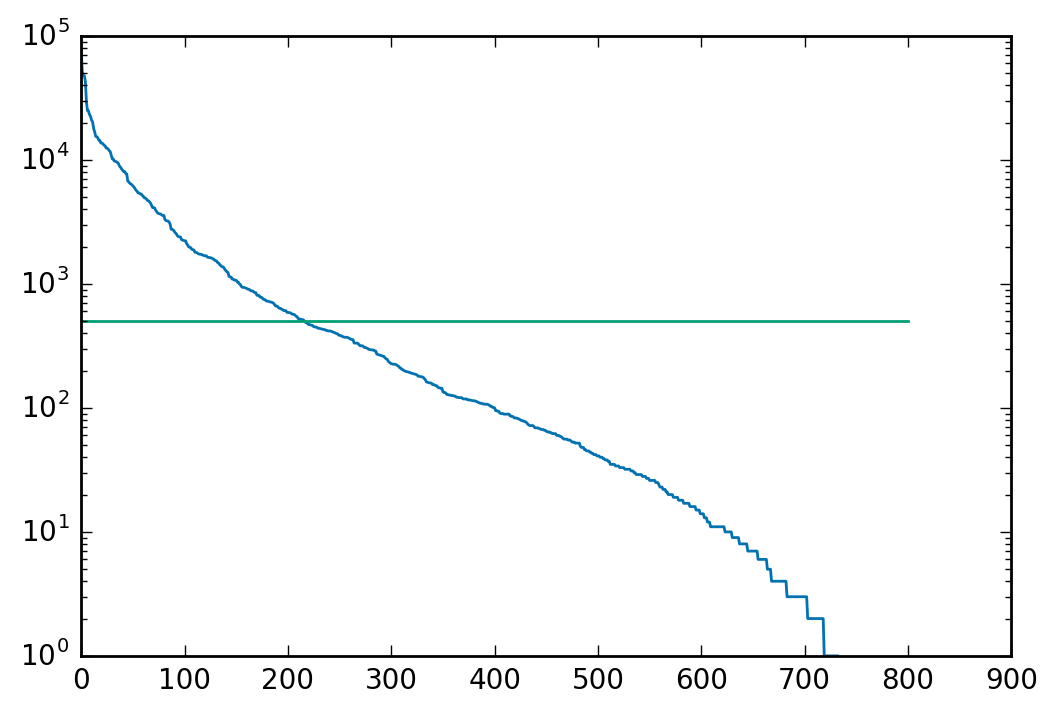

In [27]:
# load in terms and count
terms_file = './data_pubmed/term_count_cog.csv'
terms = []
terms_count = []
with open(terms_file, 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        terms.append(row[0])
        terms_count.append(int(row[1]))

terms_count = np.asarray(terms_count)
count_thresh = 500.
print len(np.where(terms_count>=count_thresh)[0])
t_sorted = np.sort(terms_count)
plt.semilogy(t_sorted[::-1])
plt.plot([1.,800.],[count_thresh]*2)

# threshold by counts
terms_thr = [terms[idx] for idx in np.where(terms_count>=count_thresh)[0]]
print terms_thr

with open('./data_pubmed/terms_thr_cog.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for t in enumerate(terms_thr):
        spamwriter.writerow(t)

In [17]:
#scrape for pairwise counts in cog base
base_phrase_cog = 'AND("cognitive"OR"cognition")'
#365464 total
countsmat = Count()
countsmat.set_terms(terms_thr[150:])
countsmat.scrape_pairs(db='pubmed', base_phrase=base_phrase_cog)

0 prototype
1 psychosis
2 reading
3 reasoning
4 recall
5 recognition
6 rehearsal
7 resource
8 response inhibition
9 response selection
10 retention
11 retrieval
12 rhythm
13 rigidity
14 risk
15 routine
16 rule
17 sadness
18 salience
19 schema
20 search
21 selective attention
22 self control
23 self monitoring
24 semantic memory
25 semantic processing
26 serial learning
27 set shifting
28 short term memory
29 skill
30 sleep
31 social cognition
32 social context
33 social phobia
34 spatial attention
35 spatial cognition
36 spatial memory
37 spatial working memory
38 speech perception
39 speech production
40 strategy
41 Strength
42 stress
43 suicidal ideation
44 sustained attention
45 syntax
46 task difficulty
47 task switching
48 theory of mind
49 thought
50 trait anxiety
51 transduction
52 uncertainty
53 updating
54 utility
55 valence
56 verbal fluency
57 verbal memory
58 visual acuity
59 visual attention
60 visual memory
61 visual pattern recognition
62 visual perception
63 visual sear

In [18]:
# save to file
countsmat.dat_numbers
np.savetxt('paircount_PMcog.csv', countsmat.dat_numbers, delimiter=',')